In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
data = pd.read_csv('./mydataset2.csv')
data.dropna(inplace=True, axis=1)
data.head()

,zone,AP_ITISLI03_5.0,AP_ITISLI02,AP_SMART50,itis-wifi2,AP_SMART25,AP_ITISLI03_2.5,itis-wifi,itis-pvt,wifi-itis,wifi-lab01
0,CorridoioLab_4,-95,-95,-95,-72,-95,-82,-73,-73,-80,-72
1,CorridoioLab_4,-95,-95,-95,-79,-95,-75,-77,-79,-79,-73
2,CorridoioLab_4,-95,-95,-95,-84,-95,-81,-79,-80,-82,-74
3,CorridoioLab_4,-95,-95,-95,-83,-95,-83,-69,-76,-73,-76
4,CorridoioLab_4,-95,-95,-95,-78,-95,-95,-70,-79,-72,-80


No handles with labels found to put in legend.


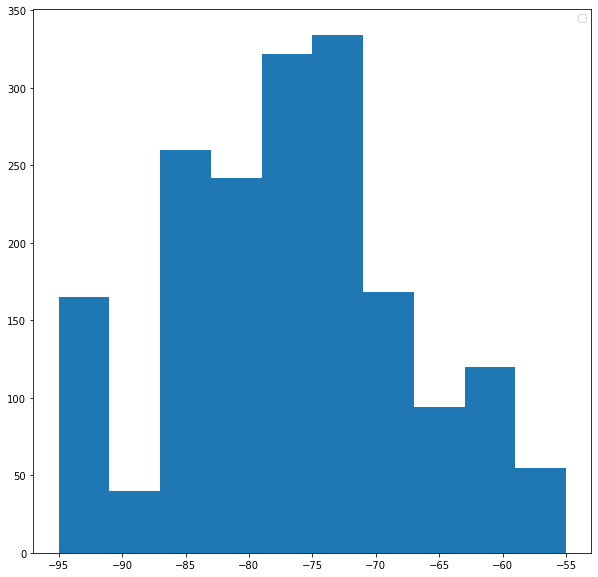

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.hist(data['itis-pvt'])
plt.legend()
plt.show()


In [36]:
features = data.columns.values
features = features[np.logical_and(features != 'zone', np.logical_and(features != 'AP_SMART25',
                                   np.logical_and(features != 'AP_ITISLI03_5.0', np.logical_and(features != 'AP_ITISLI02',
                                   features != 'AP_SMART50'))))]
features

array(['itis-wifi2', 'AP_ITISLI03_2.5', 'itis-wifi', 'itis-pvt',
       'wifi-itis', 'wifi-lab01'], dtype=object)

In [37]:
data[data['zone'] == 'Aula3_0_1'].describe()

,AP_ITISLI03_5.0,AP_ITISLI02,AP_SMART50,itis-wifi2,AP_SMART25,AP_ITISLI03_2.5,itis-wifi,itis-pvt,wifi-itis,wifi-lab01
count,180.0,180.0,180.0,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-95.0,-95.0,-95.0,-85.711111,-95.0,-50.561111,-86.294444,-86.972222,-85.072222,-85.561111
std,0.0,0.0,0.0,8.503360,0.0,9.749467,8.370404,8.374896,8.460246,8.587482
min,-95.0,-95.0,-95.0,-95.000000,-95.0,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-95.0,-95.0,-95.0,-95.000000,-95.0,-49.000000,-95.000000,-95.000000,-95.000000,-95.000000
50%,-95.0,-95.0,-95.0,-87.000000,-95.0,-48.000000,-87.000000,-88.000000,-86.000000,-87.000000
75%,-95.0,-95.0,-95.0,-76.000000,-95.0,-47.000000,-77.000000,-76.000000,-76.000000,-76.000000
max,-95.0,-95.0,-95.0,-72.000000,-95.0,-45.000000,-73.000000,-72.000000,-69.000000,-73.000000


In [38]:
data = data[['itis-wifi2', 'AP_ITISLI03_2.5', 'itis-wifi', 'itis-pvt',
       'wifi-itis', 'wifi-lab01', 'zone']]
data


,itis-wifi2,AP_ITISLI03_2.5,itis-wifi,itis-pvt,wifi-itis,wifi-lab01,zone
0,-72,-82,-73,-73,-80,-72,CorridoioLab_4
1,-79,-75,-77,-79,-79,-73,CorridoioLab_4
2,-84,-81,-79,-80,-82,-74,CorridoioLab_4
3,-83,-83,-69,-76,-73,-76,CorridoioLab_4
4,-78,-95,-70,-79,-72,-80,CorridoioLab_4
...,...,...,...,...,...,...,...
1795,-95,-55,-95,-95,-81,-84,Aula3_0_2
1796,-95,-53,-85,-84,-86,-84,Aula3_0_2
1797,-83,-54,-95,-95,-95,-95,Aula3_0_2
1798,-81,-54,-82,-95,-86,-79,Aula3_0_2


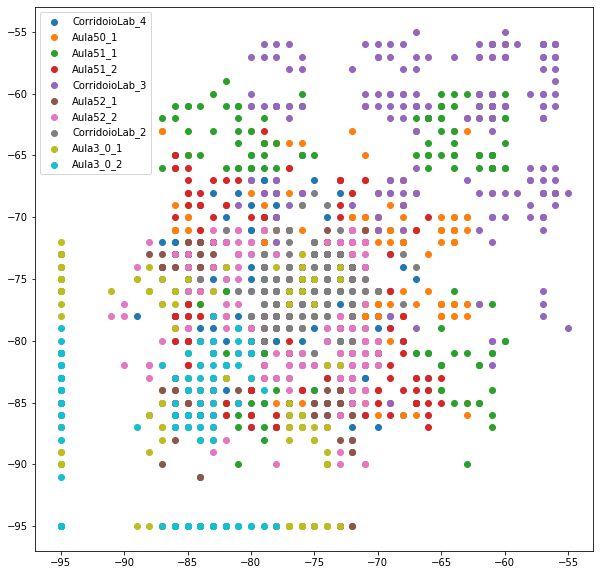

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
for z in data['zone'].unique():
    ax.scatter(data['itis-wifi'][data['zone'] == z], data['itis-pvt'][data['zone'] == z], marker='o', label=z)
plt.legend()
plt.show()

In [40]:
X = data[features]
y = data["zone"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

print(X_train.head())

      itis-wifi2  AP_ITISLI03_2.5  itis-wifi  itis-pvt  wifi-itis  wifi-lab01
1145         -78              -72        -80       -73        -78         -71
927          -73              -73        -75       -73        -72         -73
1189         -82              -74        -71       -81        -85         -84
1065         -74              -73        -85       -75        -72         -73
671          -72             -120        -80       -86        -68         -77


In [15]:
depth = range(1,8)
train_score = []
test_score = []

for d in depth:
    net_classifier = RandomForestClassifier(max_depth=d, n_estimators=150)
    net_classifier.fit(X_train, y_train)
    train_score.append(net_classifier.score(X_train, y_train))
    test_score.append(net_classifier.score(X_test, y_test))

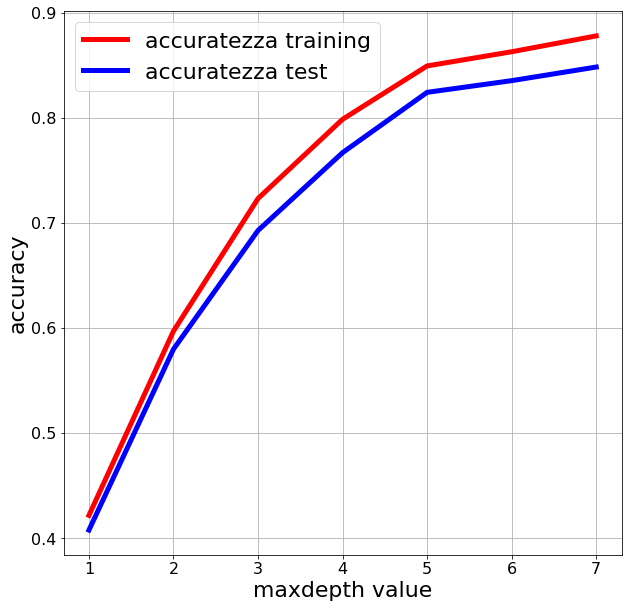

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(depth, train_score, color='r', label='accuratezza training', linewidth=5)
ax.plot(depth, test_score, color='b', label='accuratezza test', linewidth=5)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel('maxdepth value', fontsize=22)
ax.set_ylabel('accuracy', fontsize=22)
ax.legend(fontsize=22)
ax.grid("both")
plt.show()

In [17]:
for i, f in enumerate(features):
    print(f"importanza di {f}: {net_classifier.feature_importances_[i]:.2f}")

importanza di itis-wifi2: 0.12
importanza di AP_ITISLI03_2.5: 0.42
importanza di itis-wifi: 0.11
importanza di itis-pvt: 0.16
importanza di wifi-itis: 0.08
importanza di wifi-lab01: 0.11


In [18]:
from joblib import dump, loadfeatures

dump(net_classifier, 'net_classifier.joblib')
#model = load('net_classifier.joblib')

['net_classifier.joblib']